# Fashion-MNIST

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

## 패션 MNIST 데이터셋 임포트하기

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [13]:
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [14]:
test_images.shape

(10000, 28, 28)

## 데이터 전처리

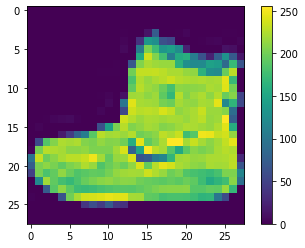

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

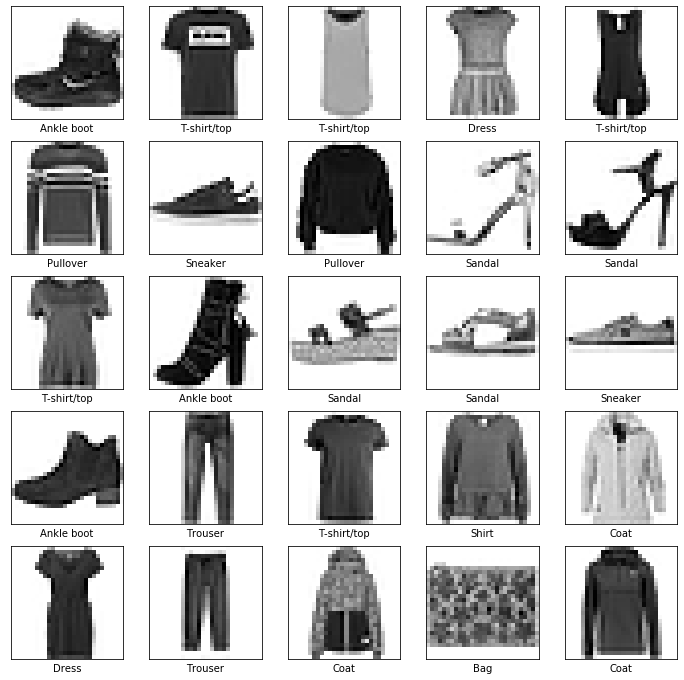

In [17]:
# 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

In [20]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5019 - accuracy: 0.8239
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3783 - accuracy: 0.8636
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3393 - accuracy: 0.8776
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3138 - accuracy: 0.8852
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2962 - accuracy: 0.8910


## 정확도 평가

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 1s - loss: 0.3417 - accuracy: 0.8759

테스트 정확도: 0.8759


## 예측 만들기

In [22]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([3.2980315e-06, 2.0414716e-07, 5.0897588e-06, 1.3370874e-06,
       3.4293203e-07, 3.3191867e-02, 8.1384624e-06, 7.0794985e-02,
       2.8750132e-05, 8.9596599e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
# 실제 값
test_labels[0]

9

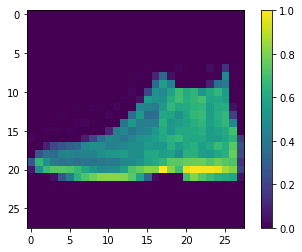

In [27]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()